## Setup

In [ ]:
# Rerun this before you do anything else and then "restart runtime"
!pip install scattertext
!pip install textacy
!pip install --upgrade spacy
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 7.3 MB 4.9 MB/s 
     |████████████████████████████████| 24.1 MB 1.6 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9310 sha256=24b43ebf049e586347a4a0d4f56f20fbe003f283c20748420f6a2f32349ea208
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 200 kB 5.4 MB/s 
     |████████████████████████████████| 137 kB 44.2 MB/s 
     |████████████████████████████████| 6.0 MB 18.2 MB/s 
     |████████████████████████████████| 2.0 MB 43.5 MB/s 
     |████████████████████████████████| 481 kB 41.4 MB/s 
     |████████████████████████████████| 628 kB 48.7 MB/s 
     |████████████████████████████████| 451 kB 54.1 MB/s 
     |█████████████████████████████

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import spacy
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns

pd.options.display.max_colwidth = 200

In [ ]:
# We will be using the large English spacy model (pipeline)
nlp = spacy.load("en_core_web_lg")

In [ ]:
data_folder = Path("/content/drive/MyDrive/NaturalLanguageUnderstanding/")

## Named entities
Let's wine
![picture](https://drive.google.com/uc?id=1uswS0zmpPaaoVQJ6cfbrci8HyG2mm9KP)

In [ ]:
# Load dataset
wine_reviews = data_folder / 'Wine dataset.csv'
# Inspect the data frame
wine_df = pd.read_csv(wine_reviews)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             65499 non-null  int64  
 1   country                65467 non-null  object 
 2   description            65499 non-null  object 
 3   designation            46588 non-null  object 
 4   points                 65499 non-null  int64  
 5   price                  60829 non-null  float64
 6   province               65467 non-null  object 
 7   region_1               54744 non-null  object 
 8   region_2               25170 non-null  object 
 9   taster_name            51856 non-null  object 
 10  taster_twitter_handle  49467 non-null  object 
 11  title                  65499 non-null  object 
 12  variety                65499 non-null  object 
 13  winery                 65499 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 7.0+

In [ ]:
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks


In [ ]:
# Remove unused coloumns
wine_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Cleanup
wine_df.dropna(subset=['price', 'description', 'country', 'province'], inplace=True) # drop some empty entries


In [ ]:
# Just to do a quick inspection. Try to select descriptions with a given keyword, e.g., 'toasty wine', 'light and fruity wine'
wine_mask = wine_df['description'].str.contains('toasty wine')
wine_df[['description', 'country']].loc[wine_mask]

,description,country
3019,"This ripe, full, almost toasty wine tastes of tropical fruit and spice, giving it an exotic feel. At the same time, the right amount of acidity acts as a fine balance. This concentrated wine, medi...",France
5911,"A ripe, toasty wine, very buttery. It has rich, almost sweet yellow fruit balanced with a wonderful mineral texture. The wine, of course, is still very young, but shows its future as being rounded...",France
6949,"Fragrant, smoky, oaky and seductive, this toasty wine is immediately appealing, and has been given the all-star treatment. The young vineyard offers promising fruit; its flavors light and clean, t...",US
9065,"This spicy, toasty wine currently shows more wood than fruit. Hints of yellow fruits are already there, so the texture should open to give a riper, fruitier wine. Give it until 2020.",France
9658,"One of the most beautiful package designs in the state introduces a fresh and toasty wine that translates this cool, wet vintage into a most delicate and enjoyable bottle of Pinot. Light cranberry...",US
10531,"With a high proportion of Chardonnay, this is a ripe, full-bodied and lightly toasty wine. It's rich in the mouth and rounded with the crisp green acidity playing a good supporting role. This bott...",France
10562,"New wood aromas lead this toasty wine that has spice, high toast flavors and the smallest hint of fruit. If the producer had not been so enthusiastic with the oak, this could have been a good wine.",France
12276,"Ripe, round, toasty wine, with rich, plummy fruit and a full-throttle palate feel. Nicely made and surprisingly evolved; jammy and pleasure-packed. Finishes with a pleasing fruit sweetness.",US
15272,"Chardonnay is an important part of the landscape in the Sézanne area south of Epernay. This ripe, toasty wine has a rich, warm take on the grape. Almonds and hazelnuts mingle with peach and pear f...",France
15421,"The wine is soft and rounded. With creamed apple and pear flavors over touches of wood, it is a toasty wine in a generous style that has made Meursault popular for many years. Fruity and ripe, the...",France


In [ ]:
# Check most expensive wines
expensive_mask = wine_df.price.nlargest(10)
wine_df.reset_index(drop=True, inplace=True)
wine_df[['description', 'country']].loc[expensive_mask]

,description,country
2500.0,"This is 89% Cabernet Sauvignon, 8% Merlot and 3% Syrah. It's toasty to the max, with scents and flavors of coffee and smoke as much as berry and cassis. There is great acid/tannin balance and some...",US
2000.0,"Purple flower and mature dark berry aromas lift out of the glass. Extremely simple and diluted, the palate offers suggestions of morello cherry, a hint of spice and loose-knit fleeting tannins.",Italy
1900.0,"Ready for drinking now with its raspberries, currants, persimmons and oak. The acidity is bright, and the finish is clean and spicy. Pair now with lamb dishes.",US
1300.0,"More tannic, drier and more acidic than most fine coastal Syrahs, this one from the Sierra Foothills is marked by its firm structure.The black currant, licorice, beef jerky and tobacco flavors are...",US
1200.0,"Cusumano's fresh Insolia delivers a steady, neutral nose with distant aromas of honey, Golden Delicious apple and dried grass. It's a lean, simple wine at a competitive price.",Italy
1100.0,"With its peppery spices and briary, brambly notes of ripe wild berries, this wine tastes more like Zinfandel than Merlot. It's not true to the variety, but it is a solid red wine, dry and full-bod...",US
1000.0,"As in nearby Sauternes, 2005 produced some exceptionally rich botrytised wine in Monbazillac. This example from one of the leading Bergerac producers certainly shows plenty of richness, but it see...",France
980.0,"Varietally correct aromas of peach and melon form a good opening to this mostly fresh but fading Albariño. Flavors of melon, papaya and peach are typical for the grape, and the finish is holding o...",Spain
932.0,"Mauro will always show you a lot, but frankly this 2005 seems soft and chunky. It has rich, baked, black-fruit aromas and then a mildly syrupy palate with huge blackberry and cassis flavors. The f...",Spain
886.0,"Cool aromas of cola, leather and black cherry set up a fairly full but fresh palate with moderate creamy weight. This tastes reedy and spicy, with wild-berry fruit, peppery notes and a distinct fl...",Spain


In [ ]:
wine_df['country'].value_counts()

US                        27058
France                     8961
Italy                      8633
Spain                      3377
Portugal                   2538
Chile                      2228
Argentina                  1887
Austria                    1364
Australia                  1158
Germany                    1030
New Zealand                 709
South Africa                644
Israel                      248
Greece                      239
Canada                      106
Bulgaria                     68
Romania                      67
Uruguay                      61
Hungary                      61
Turkey                       43
Croatia                      43
Georgia                      37
Slovenia                     36
England                      33
Mexico                       31
Moldova                      30
Brazil                       27
Lebanon                      20
Morocco                      11
Peru                          8
Serbia                        7
Macedoni

In [ ]:
# What entities should I keep?
nlp.get_pipe('ner').labels

('CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART')

In [ ]:
# For now, we will keep all NERs
def generate_named_entities(comment):
    '''Returns the text snippet and its corresponding entity label in a list'''
    return [(ent.text.strip(), ent.label_) for ent in nlp(comment).ents ]

In [ ]:
# Extract named entities from the wine data for a country.
wine_ag = wine_df[wine_df['country'].isin(['South Africa'])].copy()
wine_ag['named_entities'] = wine_ag['description'].apply(generate_named_entities)
wine_ag.reset_index(drop=True, inplace=True)

Assumption is that the more named entities and the more blahblah, the higher price. Name dropping effect. Let's check if there is any correlation.

In [ ]:
# Add simple token count to calculate the number of entities in a description
wine_ag['num_entities'] = wine_ag['named_entities'].apply(lambda x: len(x))

# Add blah blah effect: assumption is that expensive alcohol is descriped extensively.
# Add 'Review lenght'
wine_ag['num_char'] = wine_ag['description'].astype(str).apply(len)

In [ ]:
# Inspect new features
wine_ag[['description','num_char','price','points', 'named_entities','num_entities','variety', 'winery']]

,description,num_char,price,points,named_entities,num_entities,variety,winery
0,"Etienne Le Riche is a total Cabernet specialist. With a tiny production of 5,000 cases across all his wines, this is boutique in the best sense. The Reserve Cabernets are, of course, the stars. Th...",313,45.0,91,"[(Etienne Le Riche, PERSON), (5,000, CARDINAL), (The Reserve Cabernets, ORG), (2003, DATE)]",4,Cabernet Sauvignon,Le Riche
1,"A big, black bruiser of a wine that has black olive flavors and aromas and plenty beyond. Raspberry, mulberry, vanilla and spice all vie on the nose, while the palate is so dark it´s tough to disc...",272,25.0,91,"[(Raspberry, PERSON), (three years, DATE)]",2,Bordeaux-style Red Blend,Camberley
2,"A Cabernet-dominated (98%) wine, which boasts a dense, concentrated tannic structure. Flavors of cassis underly this, while the wood spices contribute their ribbon of flavor. This is an impressive...",281,30.0,91,"[(98%, PERCENT), (Spatz Sperling, PERSON), (30 years ago, DATE)]",3,Cabernet Sauvignon,Delheim
3,"This is a concentrated, fairly full and lush Chenin, rich in toasty oak and vanilla cream as well as notes of baked apple pie and sweet orange. The medium-weight palate is mouthfilling and satisfy...",336,23.0,90,"[(Chenin, PERSON)]",1,Chenin Blanc,Spier
4,"A stony, flinty character leads the nose of this blend of 54% Sauvignon Blanc and 46% Sémillon, followed by scents of ripe peach, nectarine, freshly dried grass and herbs. The medium-weight palate...",388,40.0,90,"[(54%, PERCENT), (46%, PERCENT), (Sémillon, ORG)]",3,White Blend,Delaire Graff
...,...,...,...,...,...,...,...,...
639,"This solid Merlot begins with savory aromas of cloves, black cherry, and smoke, leading into like flavors in a structured, spirited package. The wine could continue to age, but makes for a good si...",240,13.0,87,[],0,Merlot,Backsberg
640,"This wine starts with a combination of white flowers, spice, tropical fruit and green notes, with dry, crisp flavors of citrus and mineral on the palate. A good wine for fans of more angular white...",279,12.0,87,"[(Asian, NORP)]",1,Sauvignon Blanc,Buitenverwachting
641,"This wine offers assertive aromas of plum, mint and cherry, and on the palate, easygoing red berry and vanilla flavors. Tannins are smooth and the mouthfeel velvety. A friendly, tasty red with cla...",245,29.0,87,[],0,Cabernet Sauvignon,Cederberg
642,"Powerful notes of tobacco leaf and curing spice lead the bouquet of this value wine, with a backbone of cassis, black cherry and plum. Medium tannins offer grip and texture to the palate, while co...",242,10.0,87,[],0,Cabernet Sauvignon,Robertson Winery


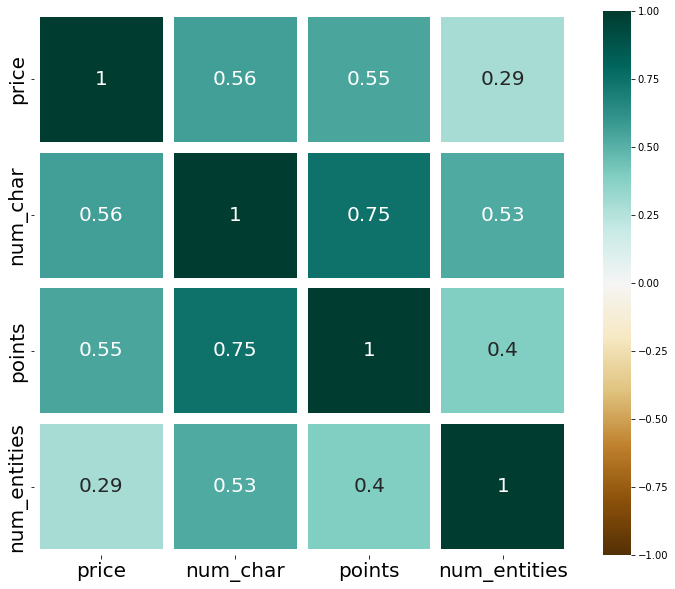

In [ ]:
# Now let's inspect if there is any correlation between price and length and price and number of entities.
correlation = wine_ag[['price', 'num_char','country','points', 'num_entities']].corr(method='pearson')
mask = np.zeros_like(correlation, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(correlation, cmap='BrBG', annot=True, annot_kws={"size": 20}, linewidths=10, vmin=-1.0)

**Pearson correlation** is a measure of the strength of a linear association between two variables and is denoted by r. It attempts to draw a line of best fit through the data of two variables, and indicates how far away all these data points are to this line of best fit (i.e., how well the data points fit this new model/line of best fit).

It can take a range of values **from +1 to -1**. A value of 0 indicates that there is no association between the two variables. A value greater than 0 indicates a positive association. A value less than 0 indicates a negative association; that is, as the value of one variable increases, the value of the other variable decreases.

In [ ]:
from spacy import displacy

In [ ]:
# Let's inspect the NERs in the first three SA descriptions
for i in range(0,3):
    if wine_ag['named_entities'][i]:
        displacy.render(nlp(wine_ag['description'][i]), style='ent', jupyter=True)

In [ ]:
# Which wines have the most entities.
ent_max = wine_ag[wine_ag['num_entities'] > 8 ]
ent_max

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,named_entities,num_entities,num_char
48,South Africa,"A super-interesting blend of 37% Syrah, 21% Mourvèdre, 18% Carignan, 10% Petite Sirah, 10% Grenache and 8% Tannat, the bouquet is loaded with assertive aromas of black currant, licorice, black oli...",Chakalaka,90,20.0,Swartland,NaN,NaN,Lauren Buzzeo,@laurbuzz,Spice Route 2009 Chakalaka Red (Swartland),Red Blend,Spice Route,"[(37%, PERCENT), (Syrah, GPE), (21%, PERCENT), (Mourvèdre, ORG), (18%, PERCENT), (Carignan, GPE), (10%, PERCENT), (Petite Sirah, PERSON), (10%, PERCENT), (Grenache, ORG), (8%, PERCENT), (Tannat, O...",12,355
132,South Africa,"Suggestions of soft spice and bark jazz-up the dark fruit center of this blend, made with 75% Syrah, 13% Cinsault, 7% Mourvèdre, 4% Carignan and 3% Grenache. Mouthwatering black cherry and raspber...",Red,85,10.0,Western Cape,NaN,NaN,Lauren Buzzeo,@laurbuzz,Goats do Roam Wine Co. 2010 Red Red (Western Cape),Red Blend,Goats do Roam Wine Co.,"[(75%, PERCENT), (Syrah, GPE), (13%, PERCENT), (Cinsault, GPE), (7%, PERCENT), (Mourvèdre, ORG), (4%, PERCENT), (Carignan, GPE), (3%, PERCENT)]",9,274
275,South Africa,"A kitchen-sink blend of 60% Shiraz, 20% Cab Sauv, 7% Grenache, 6% Mourvèdre, 4% Cinsault and 3% Viognier. Aromas of crushed violet petals are pitted against the intense mulled-raspberry and black-...",Big Easy,88,20.0,Western Cape,NaN,NaN,Lauren Buzzeo,@laurbuzz,Ernie Els 2010 Big Easy Red (Western Cape),Red Blend,Ernie Els,"[(60%, PERCENT), (Shiraz, GPE), (20%, PERCENT), (7%, PERCENT), (6%, PERCENT), (Mourvèdre, ORG), (4%, PERCENT), (Cinsault, GPE), (3%, PERCENT), (2014, DATE)]",10,311
388,South Africa,"A blend of 37% Shiraz, 19% Gamay, 18% Mourvèdre, 14% Grenache and 12% Cinsault, this soft rosé has an herbaceous kick that lends depth to the red currant and cherry fruit core. The palate is ripe ...",NaN,87,10.0,Western Cape,NaN,NaN,Lauren Buzzeo,@laurbuzz,Goats do Roam Wine Co. 2015 Rosé (Western Cape),Rosé,Goats do Roam Wine Co.,"[(37%, PERCENT), (Shiraz, GPE), (19%, PERCENT), (18%, PERCENT), (Mourvèdre, ORG), (14%, PERCENT), (Grenache, ORG), (12%, PERCENT), (Cinsault, PERSON)]",9,322
426,South Africa,"A blend of 68% Shiraz, 18% Grenache, 10% Cinsault and 4% Tinta Barocca, this is one of the finest reds coming out of South Africa today. It is powerful and concentrated, yet elegant and refined, w...",NaN,94,43.0,Swartland,NaN,NaN,Lauren Buzzeo,@laurbuzz,A.A. Badenhorst Family Wines 2013 Red (Swartland),Red Blend,A.A. Badenhorst Family Wines,"[(68%, PERCENT), (Shiraz, GPE), (18%, PERCENT), (Grenache, ORG), (10%, PERCENT), (Cinsault, GPE), (4%, PERCENT), (South Africa, GPE), (today, DATE), (2020–2025, CARDINAL)]",10,497
536,South Africa,"This organic bottling, made by the winery's former Winemaker Craig Hawkins (who now spearheads his own brand, Testalonga), is a blend of 54% Chenin Blanc, 31% Viognier and 15% Chardonnay. There's ...",LAM,89,16.0,Swartland,NaN,NaN,Lauren Buzzeo,@laurbuzz,Lammershoek 2013 LAM White (Swartland),White Blend,Lammershoek,"[(Craig Hawkins, PERSON), (Testalonga, PERSON), (54%, PERCENT), (Chenin Blanc, PERSON), (31%, PERCENT), (Viognier, ORG), (15%, PERCENT), (Asian, NORP), (Drink now–2018, ORG)]",9,502
543,South Africa,"This blend of 66% Shiraz, 16% Mourvèdre, 14% Grenache and 4% Cinsault is pure and balanced, with an immediately perceptable core of brambly berry that's accented by notes of white pepper, charred ...",NaN,92,45.0,Swartland,NaN,NaN,Lauren Buzzeo,@laurbuzz,A.A. Badenhorst Family Wines 2009 Red (Swartland),Rhône-style Red Blend,A.A. Badenhorst Family Wines,"[(66%, PERCENT), (Shiraz, GPE), (16%, PERCENT), (Mourvèdre, ORG), (14%, PERCENT), (Grenache, ORG), (4%, PERCENT), (Cinsault, PERSON), (white pepper, ORG), (2018, DATE)]",10,420


In [ ]:
if wine_ag['named_entities'][426]:
  displacy.render(nlp(wine_ag['description'][426]), style='ent', jupyter=True)

## Keywords

In [ ]:
def locations(needle, haystack): 
    """ 
    Make a list of locations, bin those into a histogram, 
    and finally put it into a Pandas Series object so that we
    can later make it into a DataFrame. 
    """
    return pd.Series(np.histogram(
        [word.i for word in haystack 
         if word.text.lower() == needle], bins=100)[0])

In [ ]:
# Take top 1000 descriptions of all wine reviews
descriptions = nlp(wine_df['description'][:1000].str.cat())

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ade052ed0>,
      dtype=object)

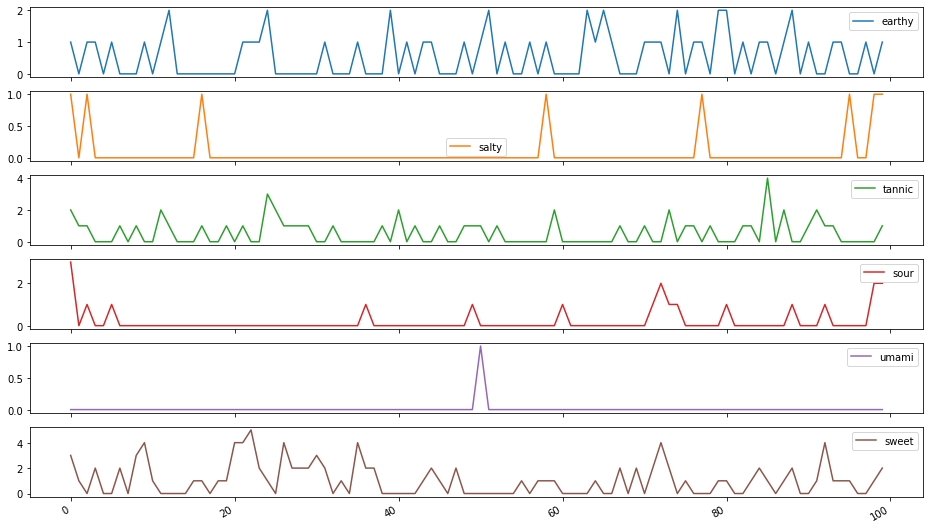

In [ ]:
# Check out the distribution of keywords in these descriptions
matplotlib.rcParams['figure.figsize'] = (16.0, 10.0)
pd.DataFrame(
    {name: locations(name.lower(), descriptions) 
     for name in ['earthy', 'salty', 'tannic', 'sour', 'umami', 'sweet']}
).plot(subplots=True)

# Try fruits: e.g., strawberry
# Try nuts: e.g., walnut, macadamia

In [ ]:
# Check countries
# We have to reload the data set because we removed all Nan before
# Load dataset
wine_reviews_countries = data_folder / 'Wine dataset.csv'
# Inspect the data frame
wine_df_countries = pd.read_csv(wine_reviews_countries, usecols=['country', 'description'])
wine_df_countries.head()

,country,description
0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will..."
2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented."
3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish."
4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country..."


In [ ]:
# Inspect number of items by countries
wine_df_countries['country'].value_counts()

US                        27177
France                    11174
Italy                     10005
Spain                      3409
Portugal                   2963
Chile                      2258
Argentina                  1907
Austria                    1635
Australia                  1177
Germany                    1051
South Africa                737
New Zealand                 733
Israel                      259
Greece                      242
Canada                      108
Bulgaria                     68
Romania                      67
Uruguay                      61
Hungary                      61
Croatia                      44
Turkey                       43
Slovenia                     39
Georgia                      37
England                      36
Mexico                       31
Brazil                       31
Moldova                      30
Lebanon                      20
Morocco                      11
Peru                          8
Serbia                        7
Macedoni

In [ ]:
# Select 2 countries only
countries_selected = wine_df_countries[(wine_df_countries['country'].isin(['Austria', 'Argentina'] )) & (wine_df_countries['description'].notnull() )]
countries_selected

,country,description
16,Argentina,"Baked plum, molasses, balsamic vinegar and cheesy oak aromas feed into a palate that's braced by a bolt of acidity. A compact set of saucy red-berry and plum flavors features tobacco and peppery a..."
17,Argentina,"Raw black-cherry aromas are direct and simple but good. This has a juicy feel that thickens over time, with oak character and extract becoming more apparent. A flavor profile driven by dark-berry ..."
93,Austria,"Freshness characterizes the nose: green pear, ivy leaves and citrus notes play on nose and palate. This is light footed, easy drinking and charming. Drink soon while flavors are fresh."
183,Argentina,"With attractive melon and other tropical aromas, this is a Torrontés that rises above the masses. It smells great and tastes like a pure blend of lychee fruit, tangerine and honeydew melon. The pa..."
224,Argentina,"Blackberry and road-tar aromas are dark and stout. This is moderately tannic and a bit rough and jagged on the palate. Flavors of stewed black plum and prune are ripe almost to an extreme, and tha..."
...,...,...
65405,Austria,"Intense, crisp acidity shines on this young wine. It's concentrated citrus is like sucking a lemon. This character shows its potential for aging. It will will develop richer, secondary flavors ove..."
65439,Austria,"A very crisp wine, with a fine mineral texture, this pulls in the direction of green fruits, citrus and a tangy, zesty character. Brisk and fragrant, it needs another few months to be at its best...."
65445,Austria,"Smooth, soft creamed fruits and fresh acidity combine easily here in this purely fruity wine. Lightly aromatic, it's a buoyant wine that's ready to drink now. Screwcap."
65447,Austria,"A simple, fruity wine, this offers lime and green-apple flavors giving complete freshness. It's a light, aromatic wine with a touch of pepper. Drink now. Screwcap."


In [ ]:
import scattertext as st
from scattertext import CorpusFromPandas, produce_scattertext_explorer
#display(HTML("<style>.container { width:98% !important; }</style>")

In [ ]:
# Prepare parsed data for scattertext analysis
# Tokenize the data with spacy
countries_selected['parsed'] = countries_selected['description'].apply(nlp)

In [ ]:
# You can see the parsed text after tokenization
countries_selected.head()

,country,description,parsed
16,Argentina,"Baked plum, molasses, balsamic vinegar and cheesy oak aromas feed into a palate that's braced by a bolt of acidity. A compact set of saucy red-berry and plum flavors features tobacco and peppery a...","(Baked, plum, ,, molasses, ,, balsamic, vinegar, and, cheesy, oak, aromas, feed, into, a, palate, that, 's, braced, by, a, bolt, of, acidity, ., A, compact, set, of, saucy, red, -, berry, and, plu..."
17,Argentina,"Raw black-cherry aromas are direct and simple but good. This has a juicy feel that thickens over time, with oak character and extract becoming more apparent. A flavor profile driven by dark-berry ...","(Raw, black, -, cherry, aromas, are, direct, and, simple, but, good, ., This, has, a, juicy, feel, that, thickens, over, time, ,, with, oak, character, and, extract, becoming, more, apparent, ., A..."
93,Austria,"Freshness characterizes the nose: green pear, ivy leaves and citrus notes play on nose and palate. This is light footed, easy drinking and charming. Drink soon while flavors are fresh.","(Freshness, characterizes, the, nose, :, green, pear, ,, ivy, leaves, and, citrus, notes, play, on, nose, and, palate, ., This, is, light, footed, ,, easy, drinking, and, charming, ., Drink, soon,..."
183,Argentina,"With attractive melon and other tropical aromas, this is a Torrontés that rises above the masses. It smells great and tastes like a pure blend of lychee fruit, tangerine and honeydew melon. The pa...","(With, attractive, melon, and, other, tropical, aromas, ,, this, is, a, Torrontés, that, rises, above, the, masses, ., It, smells, great, and, tastes, like, a, pure, blend, of, lychee, fruit, ,, t..."
224,Argentina,"Blackberry and road-tar aromas are dark and stout. This is moderately tannic and a bit rough and jagged on the palate. Flavors of stewed black plum and prune are ripe almost to an extreme, and tha...","(Blackberry, and, road, -, tar, aromas, are, dark, and, stout, ., This, is, moderately, tannic, and, a, bit, rough, and, jagged, on, the, palate, ., Flavors, of, stewed, black, plum, and, prune, a..."



Scattertext visualizes how two categories of text are different from each other 



In [ ]:
# Convert dataframe into Scattertext corpus
corpus = st.CorpusFromParsedDocuments(countries_selected, category_col='country', parsed_col='parsed').build()

In [ ]:
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

# Convert dataframe into Scattertext corpus without stop words
corpus_wo_stops = st.CorpusFromParsedDocuments(countries_selected, category_col='country', 
                                               parsed_col='parsed').build().remove_terms(ENGLISH_STOP_WORDS, ignore_absences=True)

In [ ]:
# Visuals with stop words
html = st.produce_scattertext_explorer(corpus, category='Austria', 
                                       category_name='Austria', 
                                       not_category_name='Argentina', 
                                       minimum_term_frequency=5, 
                                       term_significance = st.LogOddsRatioUninformativeDirichletPrior())

In [ ]:
# Visuals without stop words
html_wo = st.produce_scattertext_explorer(corpus_wo_stops, category='Austria', 
                                       category_name='Austria', 
                                       not_category_name='Argentina', 
                                       minimum_term_frequency=5, 
                                       term_significance = st.LogOddsRatioUninformativeDirichletPrior())

In [ ]:
from IPython.display import IFrame
from IPython.core.display import display, HTML

In [ ]:
file_name = data_folder / 'stops.html'
open(file_name, 'wb').write(html.encode('utf-8'))
#IFrame(src=file_name, width = 1200, height=700)

2096933

In [ ]:
file_name = data_folder / 'wo_stops.html'
open(file_name, 'wb').write(html_wo.encode('utf-8'))
#IFrame(src=file_name, width = 1200, height=700)

1895115

In [ ]:
import IPython
IPython.display.HTML(filename=data_folder / 'stops.html')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import IPython
IPython.display.HTML(filename= data_folder / 'wo_stops.html')

In [ ]:
import textacy as textacy
from textacy import extract

In [ ]:
en = textacy.load_spacy_lang("en_core_web_lg")

In [ ]:
# Use Argentina and Austria wine data for keyword extraction. Select descriptions for these two countries.
austria = countries_selected[countries_selected['country'] == "Austria"]['description'].str.cat()
argentina = countries_selected[countries_selected['country'] == "Argentina"]['description'].str.cat()

In [ ]:
# Convert the text into a textacy document
doc_austria = textacy.make_spacy_doc(austria, lang=en)
doc_argentina = textacy.make_spacy_doc(argentina, lang=en)

In [ ]:
extract.keyterms.textrank(doc_austria, topn=10, normalize='lower', edge_weighting='binary', position_bias=True)

[('green pear freshness', 0.027974051990475448),
 ('gentle ripe citrus freshness', 0.027813506346341936),
 ('apple fruit freshness', 0.025995110657298724),
 ('wine freshness', 0.025953241424186084),
 ('ripe lemon freshness', 0.025336293152443914),
 ('citrus peel freshness', 0.024649689907897114),
 ('footed citrus freshness', 0.024005776911630645),
 ('ample citrus freshness', 0.023712717609743),
 ('bouncy citrus freshness', 0.02333648903525603),
 ('zesty lemon freshness', 0.02307663077240223)]

In [ ]:
extract.keyterms.textrank(doc_argentina, topn=10, normalize='lower', edge_weighting='binary', position_bias=True)

[('baked black plum finish chewy', 0.034817575955001956),
 ('baked plum flavors', 0.03256884536184955),
 ('baked loamy berry aromas', 0.03084766929090286),
 ('baked black fruit flavors', 0.029669623845109745),
 ('baked fruit aromas', 0.028503438262903483),
 ('baked berry flavors', 0.028382192972822004),
 ('smooth baked apple aromas', 0.027174441908288167),
 ('baked raisiny aromas', 0.026124073864053174),
 ('baked blackberry flavors', 0.025675636232759327),
 ('baked aromas', 0.025022604519443187)]

In [ ]:
extract.keyterms.yake(doc_austria, topn=10, ngrams=(1,2), normalize='lower')


[('grüner veltliner', 0.015432112628510807),
 ('sauvignon blanc', 0.02413687730772299),
 ('pinot blanc', 0.024968841583830666),
 ('pinot noir', 0.03115858495264488),
 ('fresh grüner', 0.033816542423399744),
 ('riesling', 0.03902767166510861),
 ('wine', 0.039027932031611805),
 ('palate', 0.04359770608078182),
 ('fruit', 0.050477542722808334),
 ('grüner spice', 0.051050326267271406)]

In [ ]:
extract.keyterms.yake(doc_argentina, topn=10, ngrams=(1,2), normalize='lower')


[('cabernet sauvignon', 0.006220897872827706),
 ('malbec', 0.008344481943606557),
 ('cabernet franc', 0.012088869344303164),
 ('mendoza malbec', 0.012324462452330966),
 ('malbec flavors', 0.015056685738730199),
 ('malbec blend', 0.016732471120846703),
 ('ripe malbec', 0.01726175399608668),
 ('argentine malbec', 0.017272083493202327),
 ('cab franc', 0.018250955464878472),
 ('berry flavors', 0.021954661923818616)]

In [ ]:
#To address the issue of overlapping key phrases, textacy has a function: aggregage_term_variants.
#Choosing one of the grouped terms per item will give us a list of non-overlapping key phrases!
terms_austria = set([term for term, weight in extract.keyterms.yake(doc_austria, topn=20, ngrams=(1,2), normalize='lemma')])
print("Austria key terms: ", textacy.extract.utils.aggregate_term_variants(terms_austria))

terms_argentina = set([term for term, weight in extract.keyterms.yake(doc_argentina, topn=20, ngrams=(1,2), normalize='lower')])
print("Argentina key terms: ",textacy.extract.utils.aggregate_term_variants(terms_argentina))

Austria key terms:  [{'Cabernet Sauvignon'}, {'Grüner Veltliner'}, {'Sauvignon Blanc'}, {'fresh Grüner'}, {'fruit flavor'}, {'Grüner spice'}, {'Pinot Blanc'}, {'Pinot Gris'}, {'pear fruit'}, {'ripe fruit'}, {'Pinot Noir'}, {'Zweigelt'}, {'riesling'}, {'acidity'}, {'palate'}, {'fruit'}, {'ripe'}, {'nose'}, {'wine'}, {'pear'}]
Argentina key terms:  [{'cabernet sauvignon'}, {'patagonian malbec'}, {'tupungato malbec'}, {'argentine malbec'}, {'vineyard malbec'}, {'cafayate malbec'}, {'malbec flavors'}, {'cabernet franc'}, {'mendoza malbec'}, {'cab sauvignon'}, {'tannic malbec'}, {'berry flavors'}, {'fruit flavors'}, {'bodied malbec'}, {'berry aromas'}, {'malbec blend'}, {'good malbec'}, {'ripe malbec'}, {'cab franc'}, {'malbec'}]


## Try at 🏠 
There are other algorithms beside `TextRank` and `*Yake*`. Try them as well and see which perform better.

In [ ]:
extract.keyterms.scake(doc_austria, topn=10, normalize='lower')


[('green pear freshness', 26370562.50036615),
 ('wine freshness', 26270408.170507602),
 ('gentle ripe citrus freshness', 23359369.553315192),
 ('ripe lemon freshness', 22271692.618257113),
 ('apple fruit freshness', 22267895.42333074),
 ('citrus peel freshness', 21779653.584218245),
 ('footed citrus freshness', 21721643.829905372),
 ('ample citrus freshness', 21691617.974627167),
 ('bouncy citrus freshness', 21690573.106203664),
 ('zesty lemon freshness', 20715293.375572324)]

In [ ]:
extract.keyterms.scake(doc_argentina, topn=10, normalize='lemma')


[('baked plum flavor', 58818046.37658897),
 ('baked black plum finish chewy', 48293113.43581641),
 ('herbal red plum flavor', 47285421.34139776),
 ('tart unyielding black plum flavor', 47099688.57029),
 ('roasted red plum flavor', 46621050.62746106),
 ('saucy red plum flavor', 46612423.309150964),
 ('dark plum flavor', 46046495.153767206),
 ('lean peppery spicy plum flavor', 45937052.15975292),
 ('sweet plum flavor', 45839526.192169555),
 ('raw plum flavor', 45752739.922466196)]

Another great library you can try for keyword extraction or summarization is `summa`.
More information: https://pypi.org/project/summa/